<a href="https://colab.research.google.com/github/VigRAN084/EpsilonGreedyAlgorithm/blob/main/EpsilonGreedyAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.11569349854078241, 0.418006504141282, -1.5065027499887462, -0.7742836049368146, -0.02634278674346554, 2.678240791345169, 1.3165566961605437, -0.6412818468941317, -0.1753920553460657, 1.0095218315767975]
2.678240791345169


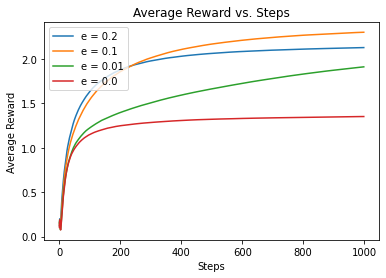

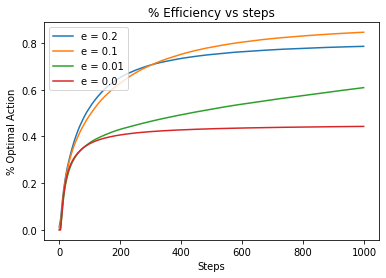

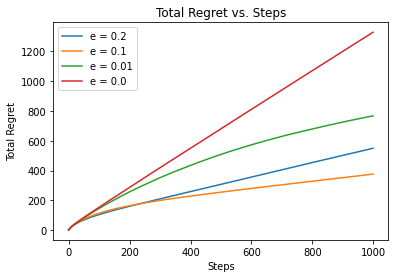

In [69]:
'''
Vignesh Rangarajan
Epsilon-Greedy Algorithm
'''

import numpy as np
import matplotlib.pyplot as plt
  

class Decision:
  def __init__(self, sampleMean):
    #sample mean amongst past selections of the arm
    self.sampleMean = sampleMean
    #mean of the reward distribution 
    self.mean = 0
    #number of selections
    self.N = 0
    
  def getReward(self): 
    #generate reward from the normal distribution of the arm
    return  self.sampleMean +  np.random.randn() 
  
  def changeAvgReward(self, r):
    #increment the number of 
    self.N += 1
    self.mean =  1.0 / self.N * r + (self.mean - 1.0 / self.N * self.mean) 

def simulation(epsilon, N, true_rewards):
  #potential decisions and their rewards
  decisions = [Decision(true_reward) for true_reward in true_rewards]
  data = np.empty(N)
  tempCounts = np.empty(N)
  maxRewards = np.empty(N)
  numberOfOptimalActions = np.empty(N)
  for i in range(N):
    #exploration when probability less than epsilon
    if np.random.random() < epsilon:
      index = np.random.choice(10)
    #exploitation when probability greater than epsilon
    #uses arm with the maximum mean value
    else:
      index = np.argmax([d.mean for d in decisions])
    #arm selection
    tempReward = decisions[index].getReward()
    decisions[index].changeAvgReward(tempReward)
  
    data[i] = tempReward
    tempCounts[i] = i+1
    
    if (index == np.argmax(true_rewards)):
      numberOfOptimalActions[i] = 1
    else:
      numberOfOptimalActions[i] = 0

  #generates avg reward after each successive selection
  actionValEstimate = np.cumsum(data) / (np.arange(N) + 1)
  #plotting data
  return [actionValEstimate, numberOfOptimalActions]
if __name__ == '__main__':
  true_rewards = [np.random.randn() for _ in range(10)]
  print(true_rewards)
  print(max(true_rewards))

  #Action Value and Regret for e = 0.2
  actionVal1 = 0.0
  actionVal2 = 0.0
  actionVal3 = 0.0
  actionVal4 = 0.0
  for i in range(1000):
    actionVal1 += simulation(0.2, 1000, true_rewards)[0]
    actionVal2 += simulation(0.1, 1000, true_rewards)[0]
    actionVal3 += simulation(0.01, 1000, true_rewards)[0]
    actionVal4 += simulation(0.0, 1000, true_rewards)[0]
  actionVal1 /= 1000.0
  actionVal2 /= 1000.0
  actionVal3 /= 1000.0
  actionVal4 /= 1000.0

  percentOpt1 = 0.0
  percentOpt2 = 0.0
  percentOpt3 = 0.0
  percentOpt4 = 0.0
  for i in range(1000):
    percentOpt1 += np.cumsum(simulation(0.2, 1000, true_rewards)[1]) * 1.0 / (np.arange(1000) + 1)
    percentOpt2 += np.cumsum(simulation(0.1, 1000, true_rewards)[1]) * 1.0 / (np.arange(1000) + 1)
    percentOpt3 += np.cumsum(simulation(0.01, 1000, true_rewards)[1]) * 1.0 / (np.arange(1000) + 1)
    percentOpt4 += np.cumsum(simulation(0.0, 1000, true_rewards)[1]) * 1.0 / (np.arange(1000) + 1)
  percentOpt1 /= 1000.0
  percentOpt2 /= 1000.0
  percentOpt3 /= 1000.0
  percentOpt4 /= 1000.0

  regret1 = (max(true_rewards) * (np.arange(1000) + 1)) - actionVal1 * (np.arange(1000) + 1)
  regret2 = (max(true_rewards) * (np.arange(1000) + 1)) - actionVal2 * (np.arange(1000) + 1)
  regret3 = (max(true_rewards) * (np.arange(1000) + 1)) - actionVal3 * (np.arange(1000) + 1)
  regret4 = (max(true_rewards) * (np.arange(1000) + 1)) - actionVal4 * (np.arange(1000) + 1)

  


  #Graph the average reward and the total regret
  plt.plot(actionVal1, label = 'e = 0.2')
  plt.plot(actionVal2, label = 'e = 0.1')
  plt.plot(actionVal3, label = 'e = 0.01')
  plt.plot(actionVal4, label = 'e = 0.0')
  plt.title('Average Reward vs. Steps')
  plt.legend(loc="upper left")
  plt.xlabel('Steps')
  plt.ylabel('Average Reward')
  plt.xscale('linear')
  plt.show()

  plt.plot(percentOpt1, label = 'e = 0.2')
  plt.plot(percentOpt2, label = 'e = 0.1')
  plt.plot(percentOpt3, label = 'e = 0.01')
  plt.plot(percentOpt4, label = 'e = 0.0')
  plt.title('% Efficiency vs steps')
  plt.legend(loc="upper left")
  plt.xlabel('Steps')
  plt.ylabel('% Optimal Action')
  plt.xscale('linear')
  plt.show()

  plt.plot(regret1, label = 'e = 0.2')
  plt.plot(regret2, label = 'e = 0.1')
  plt.plot(regret3, label = 'e = 0.01')
  plt.plot(regret4, label = 'e = 0.0')
  plt.title('Total Regret vs. Steps')
  plt.legend(loc="upper left")
  plt.xlabel('Steps')
  plt.ylabel('Total Regret')
  plt.xscale('linear')
  plt.show()

  